# <center><ins>Project Report</ins></center>

## <ins>Introduction</ins>

This project was something entirely new to me since I haven't worked with text before, and in the process of doing it, I realized there is more than meets the eye. I played around with a lot of algorithms but decided to keep a few to conduct my experiments, in order to not over-complicate things

## <ins>Libraries Used</ins>

+ <b>pandas</b>
+ <b>numpy</b>
+ <b>pyplot</b>       (for visuals)
+ <b>seaborn</b>      (for visuals)
+ <b>neattext</b>     (for text preprocessing)
+ <b>nltk</b>         (for text preprocessing)
+ <b>scikit-learn</b> (for conducting experiments and building models)

## <ins>Experiments And Model Selection</ins>

### <ins>Before Experiment Phase</ins>

#### Research

Before conducting any experiments I did a lot of research to find suitable algorithms that suited my needs for this project. I found a lot of algorithms which of whom I tried but decided to leave them, since they were completely new to me and there were very good options known to me to pick from. Furthermore, I decided to exclude decision trees and knn, because decision trees cannot handle data with high dimensionality very well and knn is a very slow and costly algorithm. My intuition told me to not mess with them.

#### Data Observations

After I loaded the dataset with pandas I did a bit of data exploration regarding how many entries of each class exists in the dataset.

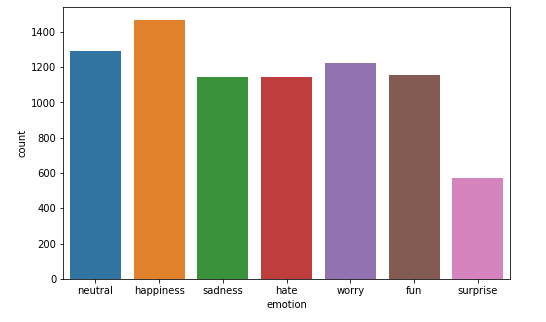

From this plot we can obeserve that the dataset is a bit imbalanced, due to the surpise class. For this reason, I used stratified k-fold cross validation to compensate for this fact. I attempted to use upsampling which in the end improved accuracy by 3-4% but decided to undo it, to avoid introducing bias.

#### Data Preprocessing

For data preprocessing I completely stripped all the text entries down to only the words seperated by single spaces, and encoded the class label for optimization purposes. I cleaned the text very well so it is perfect for processing. I was having second thoughts about removing some text features, but in the end it was better without them.

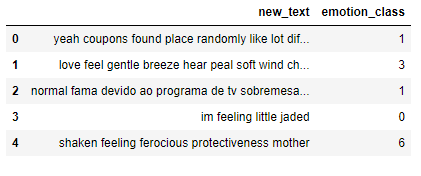

### <ins>Experiment Phase</ins>

To conduct my experiments I used three (3) algorithms/models: SVC (support vector machine), SGDClassifier (implementation of regularized linear models with stochastic gradient descent learning, with application of support vector machine), and the Naive Bayes Classifier (MultinomialNB) which is applied primarily on text. SGDClassifier was again new to me, but it has similar traits with other algorithms I have used in the past. It is related to support vector machine as well.

#### Note

For each experiment, text preprocessing modules were included in the same pipeline module as the algorithms to keep the original dataset untouched. Text Vectorization was applied, with lemmatization, and transormation to tf-idf measure.

### <ins>First Experiment</ins>

For this experiment I used the base model of each algorithm, which were fitted with the data using stratified KFold cross-validation, to compensate for the dataset imbalances.

#### Results For SVC, SGD, MNB (In Order)

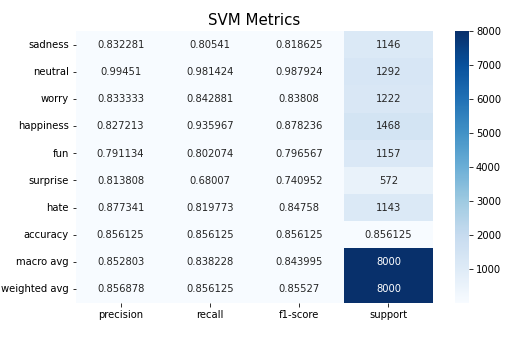

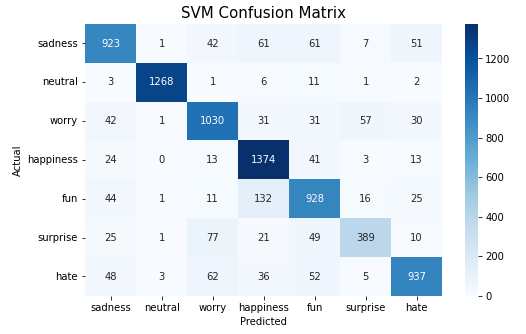

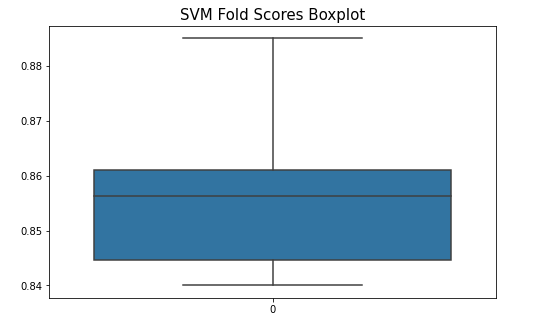

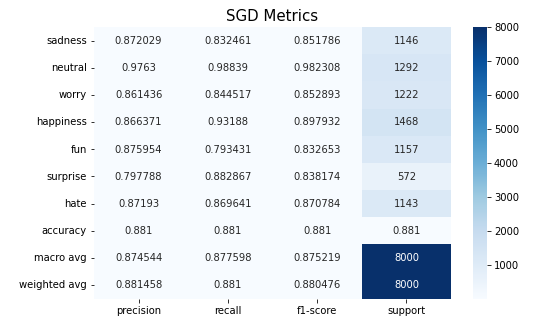

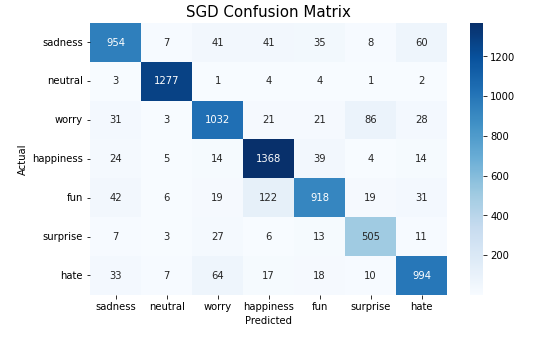

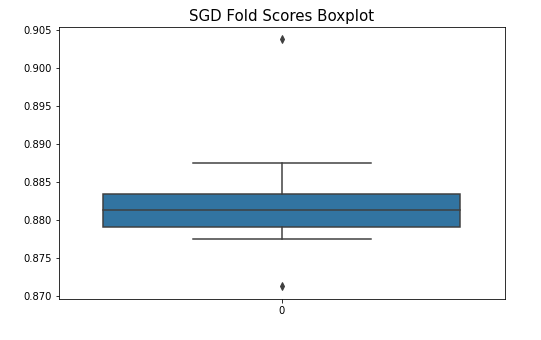

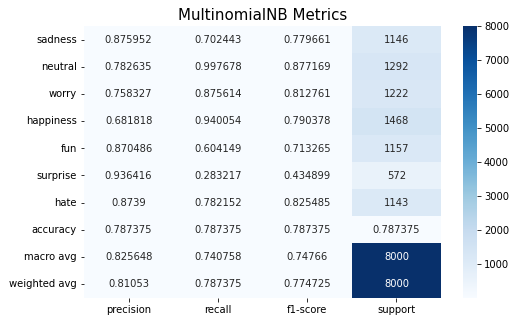

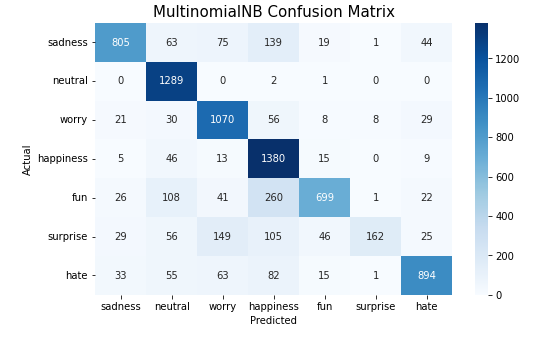

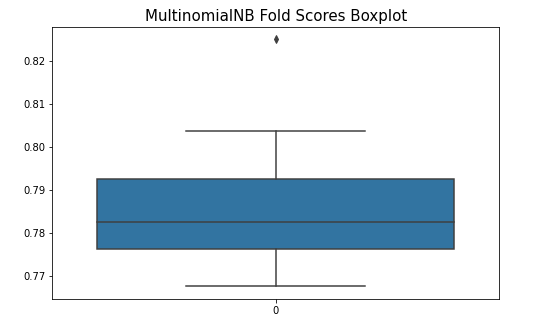

From the given results we can see that the winner is <b>SGDClassifier</b>

### <ins>Parameter Tuning (GridSearchCV)</ins>

Now, to tune the models I used a scikit-learn module called GridSearchCV, to exhaustively test chosen parameters. The parameters for each model were:

Note: ngram_range is a parameter for the vectorizer whether to have words paired/connected to one token.

svm_params = {'svm__C': [0.1, 1, 10, 100, 1000],
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svm__kernel': ('linear','rbf'),
              'vect__ngram_range': [(1, 1), (1, 2)]
             }

sgd_params = {
    "sgd__loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber"],
    "sgd__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "sgd__penalty" : ["l2", "l1", "none"],
    "sgd__learning_rate" : ["constant","optimal","invscaling","adaptive"],
    "sgd__class_weight": [None,'balanced'],
    'vect__ngram_range': [(1, 1), (1, 2)],
             }

bayes_params = {
    "mnb__alpha" : [0.01, 0.1, 0.5, 1.0, 10.0],
    "mnb__fit_prior" : (True,False),
    "vect__ngram_range":[(1,1),(1,2),(1,6)]
               }

<b>Optimal Parameters After Tune Test</b>

{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'linear', 'vect__ngram_range': (1, 2)}

{'sgd__loss': 'hinge', 'sgd__alpha': '0.0001', 'sgd__penalty': 'l1', 'sgd__learning_rate': 'optimal', 'sgd__class_weight': None, 'vect__ngram_range': (1,2)}

{'mb__alpha': 0.1, 'mb__fit_prior': False, 'vect__ngram_range': (1,6)}

### <ins>Second Experiment (With Tuning)</ins>

#### Results For SVC, SGD, MNB (In Order)

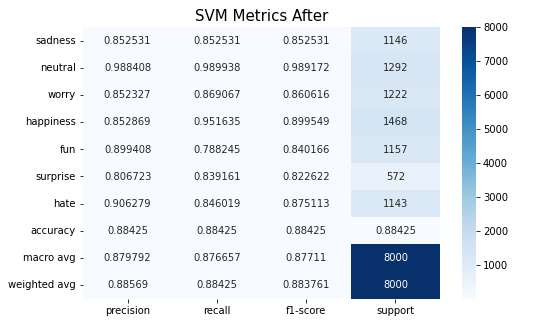

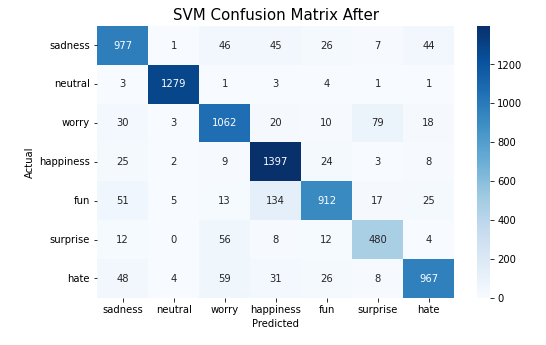

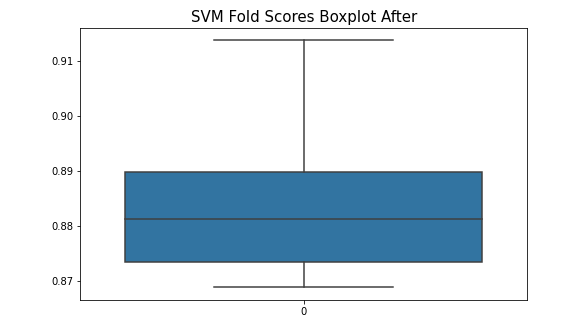

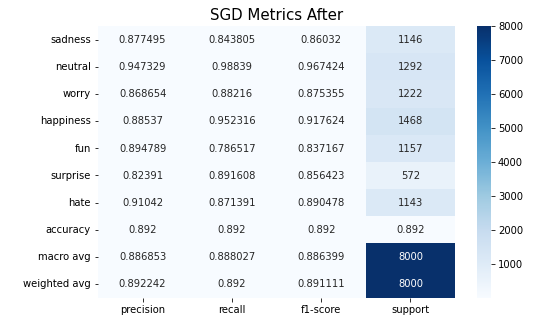

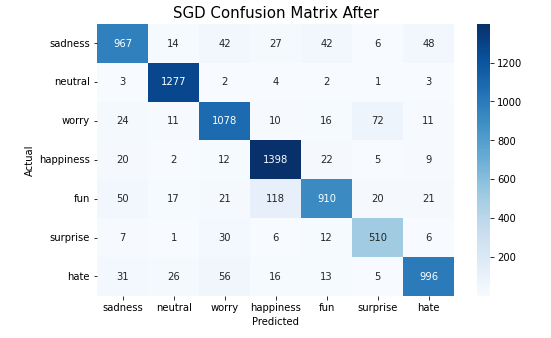

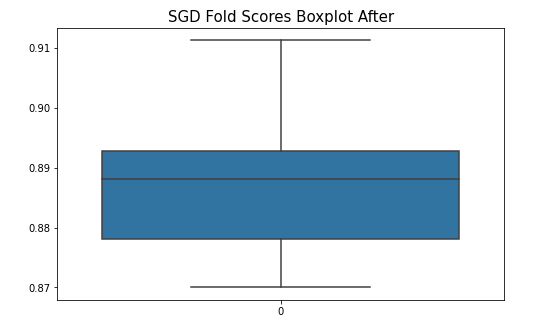

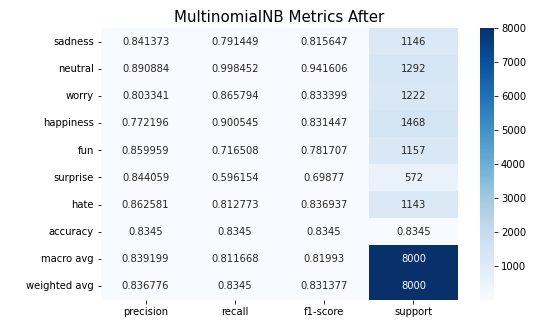

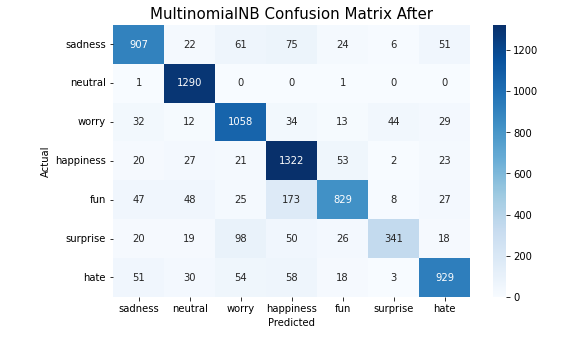

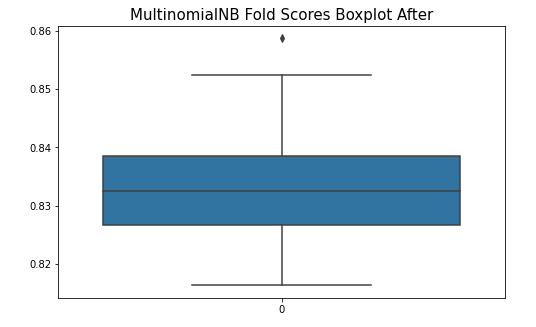

<b>The winner again is SGDClassifier</b>

### <ins>Post Experiment Phase</ins>

Here I tried using the StackingClassifier() Ensemble from scikit learn by having as base estimator the SVC() classifier and as final estimator the SGDClassifier, but results were 2-3% less than using SGDClassifier alone. So I decided to stay with just the SGDClassifier.

## <ins>Final Thoughts</ins>

This project made me understand a lot about the algorithms used and about text classification which is a very complicated topic, due to the big variety of combinations and parameters.

## <ins>Sources</ins>

[scikit-learn](https://www.scikit-learn.org/stable/)

[towards-data-science](https://towardsdatascience.com/)

[stack-overflow](https://stackoverflow.com/)

# Note

Please read the readme text file or open the main.py script with a text editor to view the instructions on installing dependencies